<a href="https://colab.research.google.com/github/lauramoraes/Analise_de_Clusters/blob/master/10%20-%20Clusteriza%C3%A7%C3%A3o%20e%20avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização


### Importando bibliotecas a serem usadas

In [1]:
install.packages("proxy")
install.packages("gdata")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘gtools’



In [0]:
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(proxy)))
suppressMessages(suppressWarnings(library(gdata)))

### Carregando os dados salvos anteriormente

In [0]:
list.files()

[1] "data_cleaned.Rdata" "data_names.Rdata"   "data_onehot.Rdata" 
[4] "sample_data"

In [0]:
vars = load("data_names.Rdata")
vars
vars = load("data_cleaned.Rdata")
vars
vars = load("data_onehot.Rdata")
vars
head(data_cleaned)

[1] "data_names"

[1] "data_cleaned"

[1] "data_onehot"

wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,p.amber,⋯,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,0,0,0,0,0,0,0,0,⋯,MIDLAND,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,SPEY,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,SOUTH,1,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,SPEY,0,0,1,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,WEST,0,0,0,0,0,0,1,0,0
0,0,1,0,0,0,0,0,0,0,⋯,SPEY,0,0,1,0,0,0,0,0,0



### 1) Utilize uma das técnicas de clusterização apresentadas para agrupar os seus dados

In [0]:
set.seed(110)
k_list <- list()
for (i in c(1:40)) {
  c <- i + 1
  if (c <= 40) {
    k_list[[i]] <- kmeans(data_onehot, centers = c, algorithm = "Lloyd", nstart=50, iter.max=100)
  }
}
  

Warning message:
“empty cluster: try a better set of initial centers”Warning message:
“empty cluster: try a better set of initial centers”Warning message:
“empty cluster: try a better set of initial centers”Warning message:
“empty cluster: try a better set of initial centers”

### 2) Escolha um número razoável de clusters. Justifique sua escolha.

Computação dos resultados do loop.

In [0]:
tot_withins = c()
for (j in k_list) {
  tot_withins = c(tot_withins, j$tot.withinss)
}                 

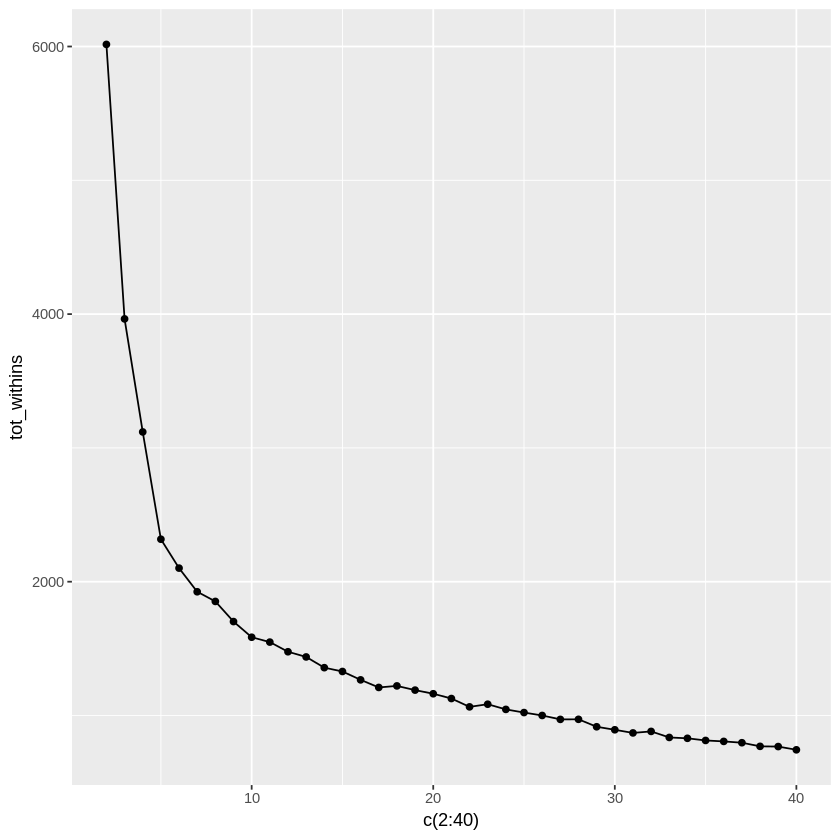

In [0]:
ggplot() +
  geom_line(aes(x=c(2:40), y=tot_withins)) +
  geom_point(aes(x=c(2:40), y=tot_withins))

O "cotovelo" do gráfico acima está na marca de 5 clusters.
Apenas para facilitar a visualização vamos reduzir a dimensionalidade e rodar o kmeans com os 5 clusters.

In [0]:
pca <- prcomp(data_onehot, scale=TRUE, center=TRUE)
pca_df <- data.frame(x=pca$x[,"PC1"], y=pca$x[,"PC2"])

In [0]:
clusters_5 <- kmeans(pca_df, centers = 5, algorithm = "Lloyd")

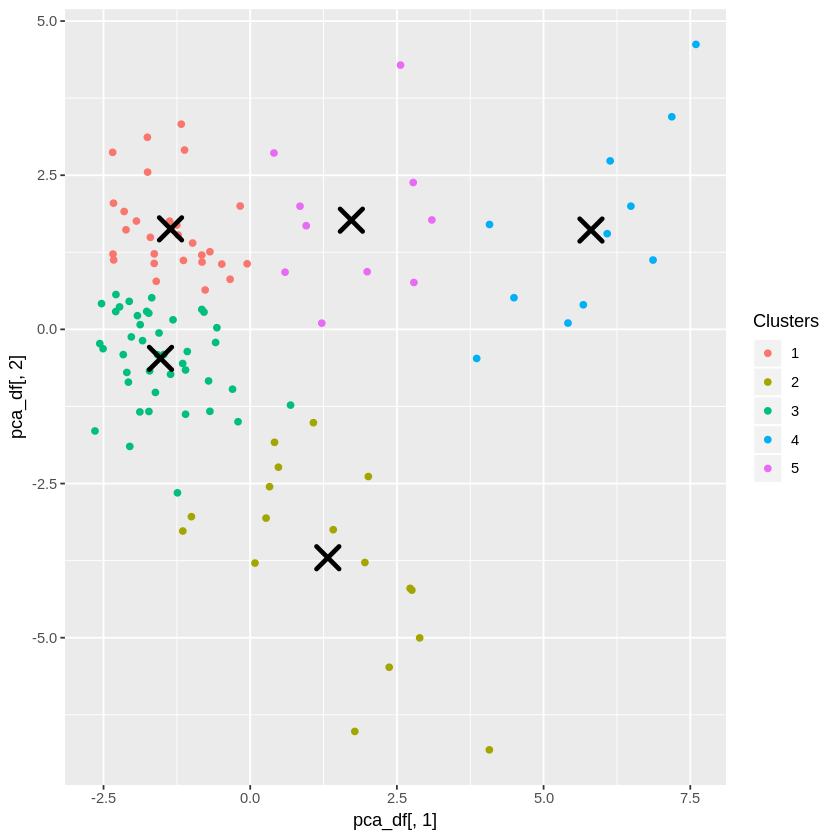

In [0]:
ggplot() +
  geom_point(aes(x=pca_df[, 1], y=pca_df[, 2], color=factor(clusters_5$cluster))) + 
  geom_point(aes(x=clusters_5$centers[, 1], y=clusters_5$centers[, 2]), color="black", size=5, shape=4, stroke=2) +
  scale_color_discrete(name = "Clusters")

#### Executando agora o k-means com 5 clusters e no datasets original

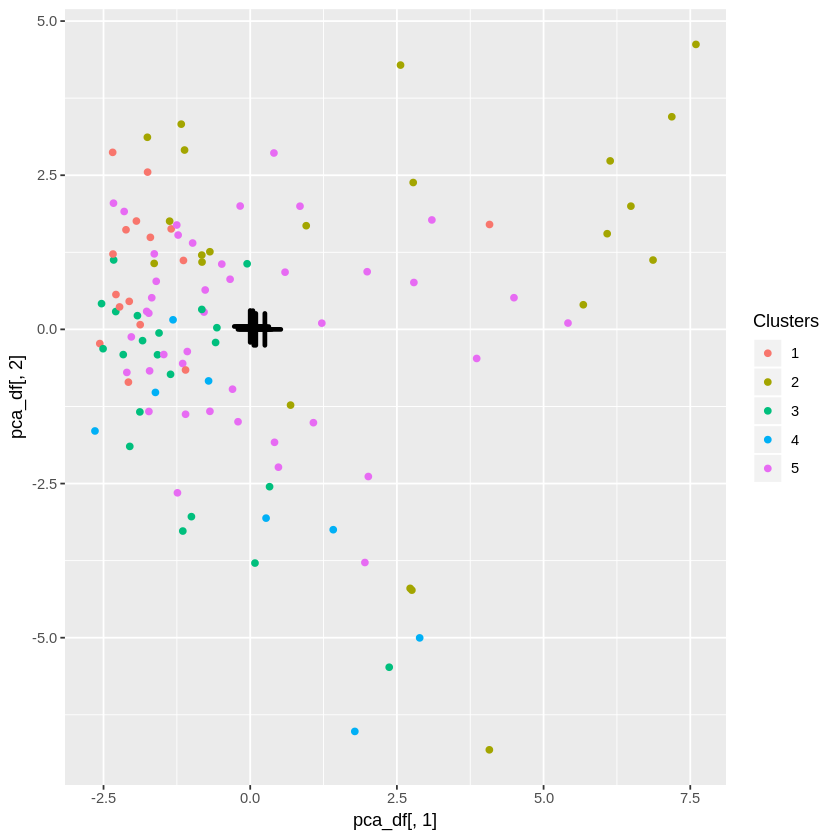

In [0]:
clusters_5_df <- kmeans(data_onehot, centers = 5, algorithm = "Lloyd")

ggplot() +
  geom_point(aes(x = pca_df[, 1], y = pca_df[, 2], color = factor(clusters_5_df$cluster))) + 
  geom_point(aes(x = clusters_5_df$centers[, 1], y = clusters_5_df$centers[, 2]), color = "black", size = 5, shape = 3, stroke = 2) +
  scale_color_discrete(name = "Clusters")

### 3) Verifique se o número escolhido de clusters apresenta uma boa separação. Escolha uma métrica como Silhoueta ou Davis-Bouldin.


In [0]:
# Escreva seu código aqui
install.packages("cluster")
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
str(clusters_5_df)

List of 9
 $ cluster     : Named int [1:109] 3 2 2 4 2 5 5 3 1 3 ...
  ..- attr(*, "names")= chr [1:109] "1" "2" "3" "4" ...
 $ centers     : num [1:5, 1:98] 0.0625 0.0455 0 0.25 0.0952 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:98] "wyne" "yellow" "v.pale" "pale" ...
 $ totss       : num 16840
 $ withinss    : num [1:5] 327 507 456 300 728
 $ tot.withinss: num 2317
 $ betweenss   : num 14523
 $ size        : int [1:5] 16 22 21 8 42
 $ iter        : int 5
 $ ifault      : NULL
 - attr(*, "class")= chr "kmeans"


Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


  cluster size ave.sil.width
1       1   16          0.39
2       2   22          0.36
3       3   21          0.40
4       4    8          0.31
5       5   42          0.44


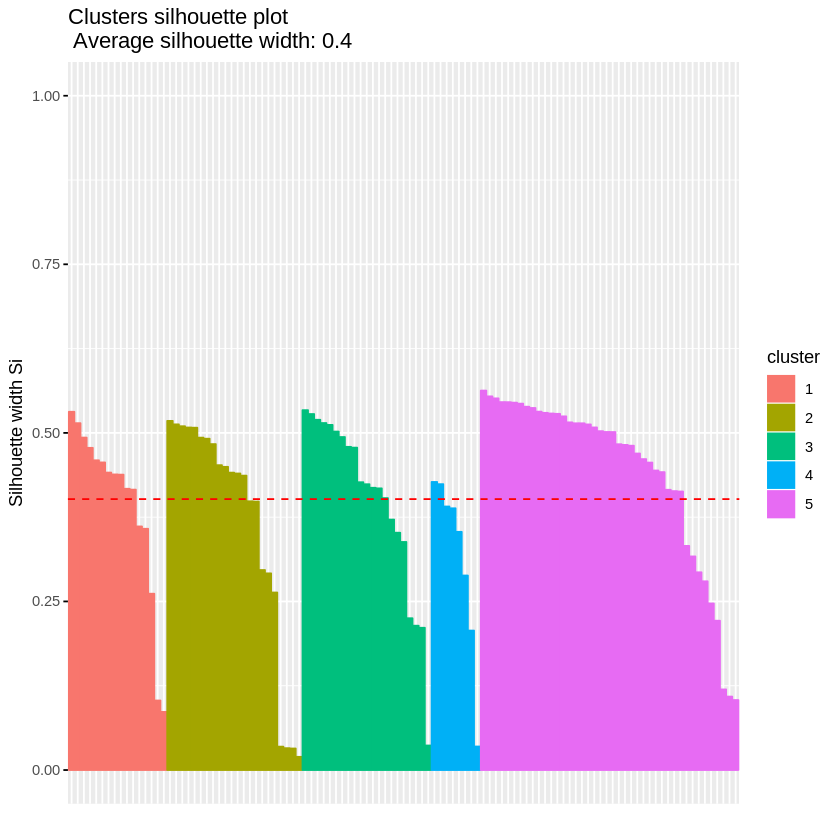

In [0]:
install.packages("factoextra")
library("factoextra")
s <- silhouette(clusters_5_df$cluster, dist(data_onehot))
fviz_silhouette(s)

### 4) Escolha um dos clusters resultantes e utilize uma árvore de decisão  para tentar compreender os resultados dos agrupamentos

In [0]:
# Escreva seu código aqui
df <- data_onehot
df['label'] <- factor(clusters_5_df$cluster)

In [0]:
#install.packages("e1071")
library("caret")
library("e1071")
df.tree = train(label ~ ., 
                  data = df, 
                  method = "rpart2", 
                  trControl = trainControl(method = "cv"))



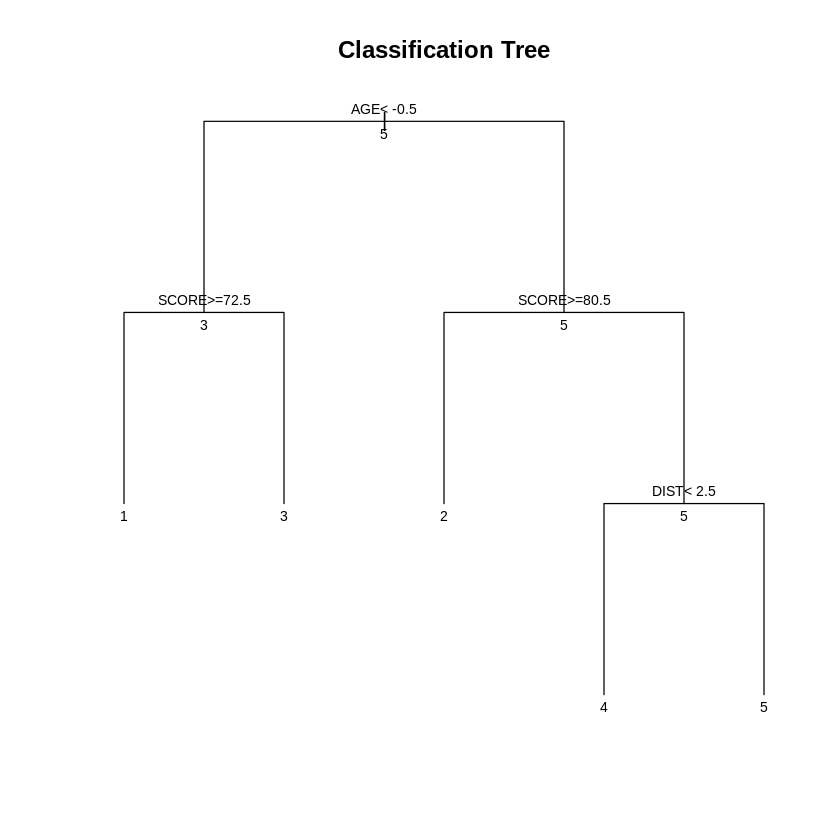

In [0]:
plot(df.tree$finalModel, uniform = TRUE, main = "Classification Tree")
text(df.tree$finalModel, all = TRUE, cex = .7)